In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/staff.csv',
              index_col='empID',
              thousands=',',parse_dates=['dob','join_date'])
df

,fname,lname,sex,dob,position,department,salary,join_date
empID,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 604 to 724
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   fname       12 non-null     object        
 1   lname       12 non-null     object        
 2   sex         12 non-null     object        
 3   dob         12 non-null     datetime64[ns]
 4   position    12 non-null     object        
 5   department  12 non-null     object        
 6   salary      12 non-null     int64         
 7   join_date   12 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 864.0+ bytes


In [5]:
from pandas.api.types import CategoricalDtype

# new way in pandas
salary_bucket=['0-15,000','15,001-30,000','30,001-50,000','50,001-80,000','80,001+']
df['salary_group'] = pd.cut(df.salary,
                           bins=[0, 15000, 30000, 50000, 80000, np.inf],
                           labels=salary_bucket,
                           right=True).astype(CategoricalDtype(salary_bucket, ordered=True))
df.sort_values(by='salary_group')

,fname,lname,sex,dob,position,department,salary,join_date,salary_group
empID,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000"
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000"
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000"
171,ณิชา,ประดู่,F,1962-04-03,พนักงานระดับต้น,HR,25000,2017-03-28,"15,001-30,000"
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,001-50,000"
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,001-50,000"
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,001-50,000"
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,001-50,000"
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,001-50,000"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 604 to 724
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fname         12 non-null     object        
 1   lname         12 non-null     object        
 2   sex           12 non-null     object        
 3   dob           12 non-null     datetime64[ns]
 4   position      12 non-null     object        
 5   department    12 non-null     object        
 6   salary        12 non-null     int64         
 7   join_date     12 non-null     datetime64[ns]
 8   salary_group  12 non-null     category      
dtypes: category(1), datetime64[ns](2), int64(1), object(5)
memory usage: 1.1+ KB


In [13]:
df.salary_group

empID
604         0-15,000
607    30,001-50,000
486    15,001-30,000
229    30,001-50,000
901          80,001+
944    30,001-50,000
405    30,001-50,000
665    15,001-30,000
41     30,001-50,000
171    15,001-30,000
51           80,001+
724    50,001-80,000
Name: salary_group, dtype: category
Categories (5, object): ['0-15,000' < '15,001-30,000' < '30,001-50,000' < '50,001-80,000' < '80,001+']

<AxesSubplot: >

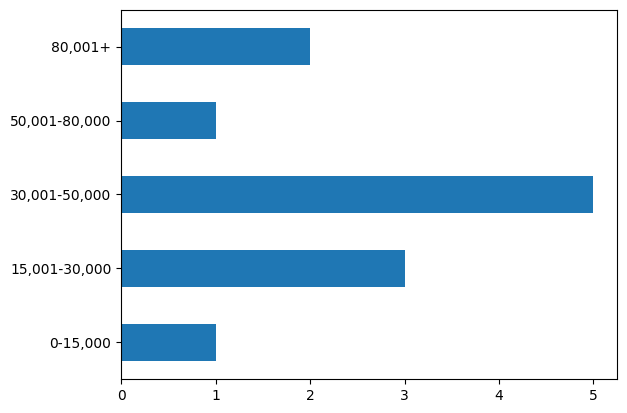

In [20]:
df.salary_group.value_counts().sort_index().plot.barh()

## การทำงานกับข้อมูลที่เป็นอายุ

In [21]:
pd.to_datetime('today').year

2022

In [4]:
df['age']=pd.to_datetime('today').year - df.dob.dt.year

In [25]:
age_cat = ['18-25','26-30','31-40','41-50','50+']
df['age_group'] = pd.cut(df.age,
                        bins=[18,25,30,40,50, np.inf],
                        labels= age_cat,
                        right=True,
                        include_lowest=True).astype(CategoricalDtype(age_cat, ordered=True))
df

,fname,lname,sex,dob,position,department,salary,join_date,salary_group,age,age_group
empID,,,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000",28,26-30
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,001-50,000",54,50+
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000",35,31-40
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,001-50,000",31,31-40
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,"80,001+",48,41-50
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,001-50,000",47,41-50
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,001-50,000",59,50+
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000",39,31-40
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,001-50,000",35,31-40


<AxesSubplot: >

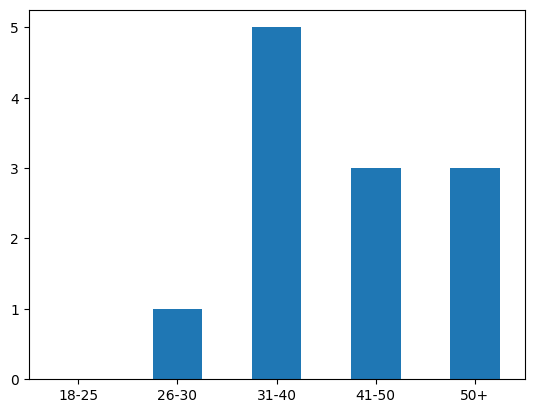

In [34]:
df.age_group.value_counts().sort_index().plot.bar(rot=360)

<AxesSubplot: ylabel='age_group'>

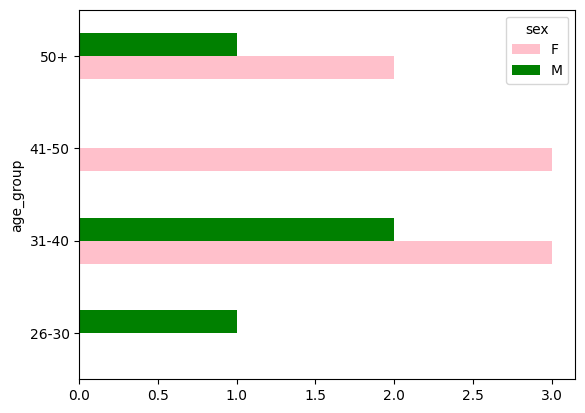

In [35]:
pd.crosstab(df.age_group, df.sex).plot(kind='barh', color=['pink','green'])

In [37]:
from IPython.display import IFrame
IFrame('https://www.careerplanner.com/Career-Articles/Generations.cfm', width=800, height=600)

In [12]:
def gen(birthdate):
    y = birthdate
    if 1946 <= y <= 1964:
        return 'Baby Boomer'
    elif 1965 <= y <= 1979:
        return 'GenX'
    elif 1980 <= y <= 1994:
        return 'GenY'
    elif 1995 <= y <= 2012:
        return 'GenZ'
    else:
        return 'GenAlpha'

In [18]:
# ใช้ได้เฉพาะ data is Date_Time

df['gen'] = df.dob.map(lambda d: gen(d)).astype(CategoricalDtype(categories=['Baby Boomer','GenX','GenY','GenZ','GenAlpha'],
                                                                ordered=True))
df

TypeError: '<=' not supported between instances of 'int' and 'Timestamp'

In [40]:
df[['age','age_group','gen']].sort_values(by='gen')

,age,age_group,gen
empID,,,
405,59,50+,Baby Boomer
171,60,50+,Baby Boomer
607,54,50+,GenX
901,48,41-50,GenX
944,47,41-50,GenX
51,50,41-50,GenX
604,28,26-30,GenY
486,35,31-40,GenY
229,31,31-40,GenY


<AxesSubplot: >

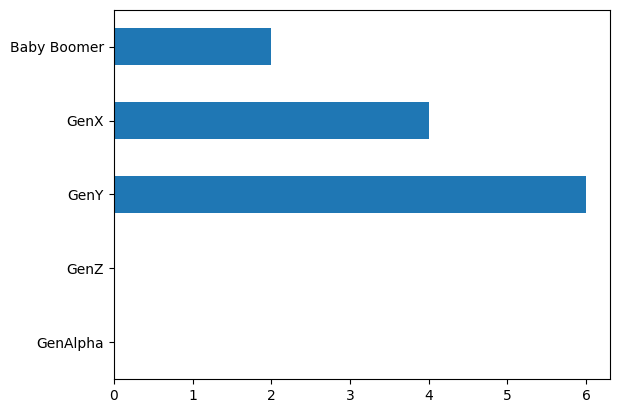

In [44]:
df.gen.value_counts().sort_index(ascending=False).plot(kind='barh')